# 4. Logistic Regression
### 공부 시간에 따른 자격증 시험 합격 가능성

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

### 데이터 분리

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### 학습 (로지스틱 회귀 모델)

In [3]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

### 6시간 공부했을 때 예측

In [4]:
classifier.predict([[6]])
# 결과 1 -> 합격할 것으로 예측

array([1], dtype=int64)

In [6]:
classifier.predict_proba([[6]]) # 합격할 확률 출력
# 불합격 확률 14%, 합격 확률 86%

array([[0.141483, 0.858517]])

### 4시간 공부했을 때 예측

In [5]:
classifier.predict([[4]])
# 결과 0 -> 불합격할 것으로 예측

array([0], dtype=int64)

In [7]:
classifier.predict_proba([[4]])
# 불합격 확률 62%, 합격 확률 38%

array([[0.62497682, 0.37502318]])

### 분류 결과 예측(테스트 세트)

In [9]:
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 0, 1, 1], dtype=int64)

In [10]:
Y_test # 실제 값 (테스트 세트)

array([1, 0, 1, 0], dtype=int64)

In [11]:
X_test # 공부 시간 (테스트 세트)

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [12]:
classifier.score(X_test, Y_test) # 모델 평가
# 전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 3개 -> 3/4 = 0.75

0.75

### 데이터 시각화 (훈련 세트)

In [13]:
X_range = np.arange(min(X), max(X), 0.1) 
# X의 최소값에서 최대값까지를 0.1 단위로 잘라서 데이터 생성

C:\Users\its\AppData\Local\Temp\ipykernel_29220\4284593638.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


In [14]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_))) 
# p -> 시그모이드 함수
# np.exp(y) = e의 y승 (e^y)
# y = mx + b
# np.exp(-(mx+b))
# m = classifier.coef_
# x = X_range
# b = classifier.intercept_
p

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [15]:
p.shape

(1, 95)

In [16]:
X_range.shape # 차원 통일 필요

(95,)

In [17]:
p = p.reshape(-1) # 1차원 배열 형태로 변경
# == p.reshape(len(p))
p.shape

(95,)

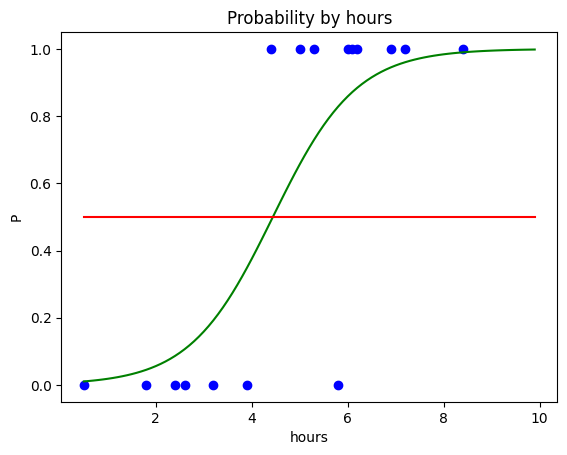

In [18]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')
# np.full(len(X_range), 0.5) -> X_range 개수만큼 0.5로 가득찬 배열 만들기
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 데이터 시각화(테스트 세트)

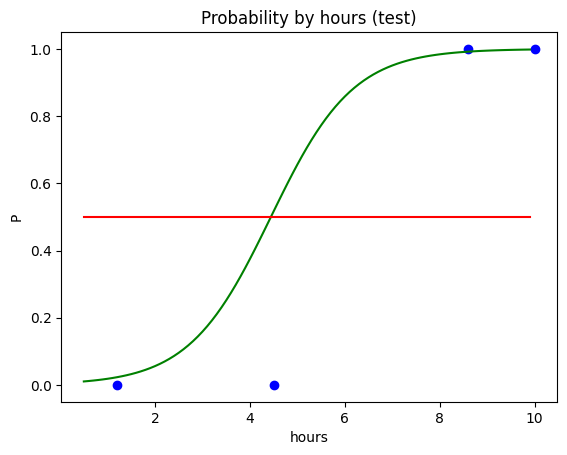

In [19]:
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')
# np.full(len(X_range), 0.5) -> X_range 개수만큼 0.5로 가득찬 배열 만들기
plt.title('Probability by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [20]:
classifier.predict_proba([[4.5]]) 
# 4.5시간 공부했을 때 확률
# 모델에서는 51% 확률로 합격을 예측, 실제로는 불합격함

array([[0.48307854, 0.51692146]])

### 혼동 행렬 (Confusion Matrix)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

# [1, 1] -> [불합격 예측 불합격 실제, 합격 예측 불합격 실제]
# [0, 2] -> [불합격 예측 합격 실제, 합격 예측 합격 실제]
# cm = array([[TN, FP], [FN, TP]])

array([[1, 1],
       [0, 2]], dtype=int64)

![이미지](https://media.licdn.com/dms/image/C4D12AQFe86FXxBAyIw/article-inline_image-shrink_1000_1488/0/1614207610690?e=1717027200&v=beta&t=Y2hGFPQOBgRXI5JLmW39dPF8p4CzlfgQ4C768HeqpZQ)